In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import svm

import seaborn as sb
import pandas as pd

import numpy as np
from numpy import mean
from numpy import sqrt
from numpy import absolute

import matplotlib.pyplot as plt 

In [9]:
data = pd.read_excel('C:\\Users\\Kavian\\Desktop\\Jupyter\\clustering_stroke.xlsx')
data

,Subject,Lession,Admission,Discharge,Score_division,Score_effective,gamma_clusteriong,gamma_asymmetry,beta_clusteriong,beta_asymmetry,alpha_clusteriong,alpha_asymmetry
0,16,R,15,73,4.866667,3.866667,0.268700,-0.015400,0.4799,-0.0190,0.5778,-0.0167
1,7,R,22,79,3.590909,2.590909,0.350609,0.032400,0.4531,-0.0174,0.5446,-0.0090
2,23,L,25,83,3.320000,2.320000,0.292100,-0.015400,0.3143,-0.0258,0.4754,-0.0241
3,22,R,26,83,3.192308,2.192308,0.346800,-0.005100,0.5242,0.0088,0.6126,0.0028
4,20,L,32,74,2.312500,1.312500,0.287100,-0.013400,0.3840,-0.0060,0.4234,-0.0105
5,11,R,34,77,2.264706,1.264706,0.308500,-0.001400,0.3692,0.0052,0.4328,-0.0040
6,3,R,26,55,2.115385,1.115385,0.384600,0.000239,0.4455,-0.0187,0.5405,-0.0246
7,9,R,31,65,2.096774,1.096774,0.281900,-0.008500,0.2707,-0.0082,0.4051,-0.0017
8,18,R,37,76,2.054054,1.054054,0.268200,-0.042400,0.3402,-0.0137,0.3954,-0.0159
9,21,L,40,82,2.050000,1.050000,0.310300,-0.041900,0.3152,-0.0130,0.3779,-0.0192


In [10]:
Score_division = data.Score_division.array
Score_effective = data.Score_effective.array

gamma_clusteriong = data.gamma_clusteriong.array
gamma_asymmetry = data.gamma_asymmetry.array

beta_clusteriong = data.beta_clusteriong.array
beta_asymmetry = data.beta_asymmetry.array

alpha_clusteriong = data.alpha_clusteriong.array
alpha_asymmetry = data.alpha_asymmetry.array

mse:  1.211535302092604
accuracy:  -0.18512911905492646
Correlation [[ 1.        -0.1067965]
 [-0.1067965  1.       ]]
K-fold_score:  0.75784712097922


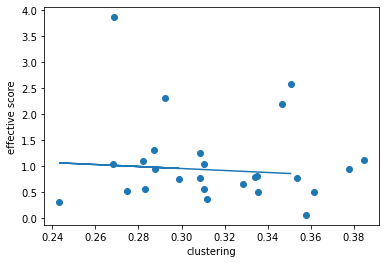

In [11]:
#Gama Band Clustering
x = gamma_clusteriong.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(gamma_clusteriong,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering')
plt.ylabel('effective score')
plt.show()

mse:  1.306443302031674
accuracy:  -0.3780807168754454
Correlation [[ 1.         -0.04671865]
 [-0.04671865  1.        ]]
K-fold_score:  0.744164821461648


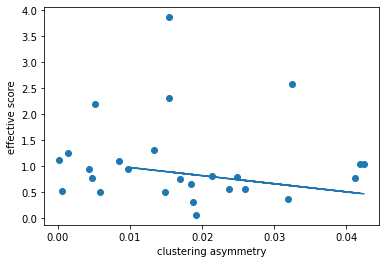

In [12]:
#Asymmetry Gama Band Clustering
x = np.abs(gamma_asymmetry).reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(np.abs(gamma_asymmetry),Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering asymmetry')
plt.ylabel('effective score')
plt.show()

mse:  1.1066279743881517
accuracy:  0.011226515670043291
Correlation [[1.         0.48116101]
 [0.48116101 1.        ]]
K-fold_score:  0.7615462595221696


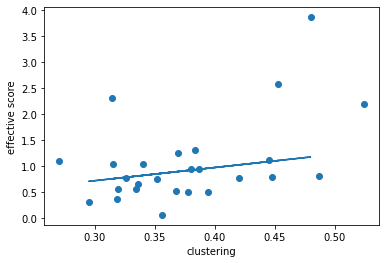

In [13]:
#Beta Band Clustering
x = beta_clusteriong.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(beta_clusteriong,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering')
plt.ylabel('effective score')
plt.show()

mse:  1.158450731974059
accuracy:  -0.08354925809085922
Correlation [[1.        0.3550978]
 [0.3550978 1.       ]]
K-fold_score:  0.7525294700079421


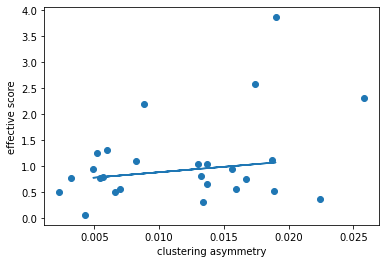

In [14]:
#Asymmetry Beta Band Clustering
x = np.abs(beta_asymmetry).reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(np.abs(beta_asymmetry),Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering asymmetry')
plt.ylabel('effective score')
plt.show()

mse:  0.9831587004157156
accuracy:  0.2195577430669825
Correlation [[1.         0.60949606]
 [0.60949606 1.        ]]
K-fold_score:  0.7527078813166116


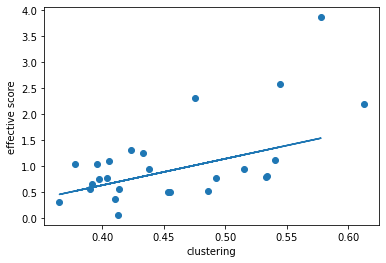

In [15]:
#Alpha Band Clustering
x = alpha_clusteriong.reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(alpha_clusteriong,Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering')
plt.ylabel('effective score')
plt.show()

mse:  1.2191485639425406
accuracy:  -0.20007056981584515
Correlation [[1.         0.09480967]
 [0.09480967 1.        ]]
K-fold_score:  0.7712906823083835


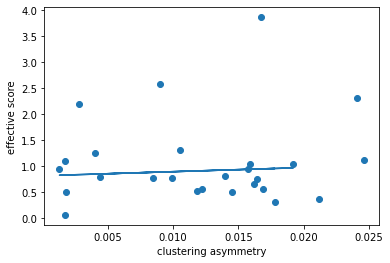

In [16]:
#Asymmetry Alpha Band Clustering
x = np.abs(alpha_asymmetry).reshape(-1,1)
y = Score_effective.reshape(-1,1)

x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
mse = sqrt(mean_squared_error(y_test, y_pred))
print('mse: ', mse)
print('accuracy: ',model.score(x_test, y_test))


corco = np.corrcoef(np.abs(alpha_asymmetry),Score_effective)
print('Correlation',corco)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
print('K-fold_score: ',sqrt(mean(absolute(scores))))

plt.scatter(x,y)
plt.plot(x_test,y_pred)
plt.xlabel('clustering asymmetry')
plt.ylabel('effective score')
plt.show()